In [1]:
import pandas as pd
import numpy as np

data_dir = "/Users/rourou/Desktop/"

x_path = data_dir + "twin_pairs_X_3years_samesex.csv"
y_path = data_dir + "twin_pairs_Y_3years_samesex.csv"
t_path = data_dir + "twin_pairs_T_3years_samesex.csv"

X = pd.read_csv(x_path)
Y = pd.read_csv(y_path)
T = pd.read_csv(t_path)

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("T shape:", T.shape)

print("\nX columns:\n", X.columns.tolist()[:10], "...")  
print("\nY columns:\n", Y.columns.tolist())
print("\nT columns:\n", T.columns.tolist())

print("\nX head():")
display(X.head())

print("\nY head():")
display(Y.head())

print("\nT head():")
display(T.head())


X shape: (71345, 54)
Y shape: (71345, 3)
T shape: (71345, 3)

X columns:
 ['Unnamed: 0.1', 'Unnamed: 0', 'pldel', 'birattnd', 'brstate', 'stoccfipb', 'mager8', 'ormoth', 'mrace', 'meduc6'] ...

Y columns:
 ['Unnamed: 0', 'mort_0', 'mort_1']

T columns:
 ['Unnamed: 0', 'dbirwt_0', 'dbirwt_1']

X head():


,Unnamed: 0.1,Unnamed: 0,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,...,feduc6,infant_id_0,infant_id_1,dlivord_min,dtotord_min,bord_0,bord_1,brstate_reg,stoccfipb_reg,mplbir_reg
0,0,0,1.0,1.0,1,1,3,0.0,1,NaN,...,NaN,1,0,NaN,NaN,NaN,NaN,5,5,1.0
1,1,1,1.0,1.0,1,1,3,0.0,2,3.0,...,NaN,7,6,2.0,3.0,2.0,1.0,5,5,5.0
2,2,2,1.0,1.0,1,1,5,0.0,1,5.0,...,3.0,11,10,NaN,NaN,NaN,NaN,5,5,1.0
3,3,3,1.0,1.0,1,1,4,0.0,2,1.0,...,1.0,15,14,4.0,4.0,1.0,2.0,5,5,5.0
4,4,4,1.0,1.0,1,1,5,0.0,2,4.0,...,NaN,23,22,NaN,NaN,NaN,NaN,5,5,5.0



Y head():


,Unnamed: 0,mort_0,mort_1
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0
3,3,0.0,0.0
4,4,0.0,0.0



T head():


,Unnamed: 0,dbirwt_0,dbirwt_1
0,0,2268.0,2296.0
1,1,2610.0,2650.0
2,2,1985.0,2098.0
3,3,2410.0,2420.0
4,4,2013.0,2637.0


## All Figures

In [3]:
# Step 2: Build baby-level dataframe from pair-level data

# Columns for lighter and heavier twins
lighter_cols = [col for col in X.columns if col.endswith("_0")]
heavier_cols = [col for col in X.columns if col.endswith("_1")]

# Shared columns (same for both twins)
shared_cols = [col for col in X.columns 
               if not col.endswith("_0") and not col.endswith("_1")]

baby_rows = []

for i in range(len(X)):

    # Filter out pairs where either twin weighs >= 2000g
    w0 = T.loc[i, "dbirwt_0"]
    w1 = T.loc[i, "dbirwt_1"]
    if w0 >= 2000 or w1 >= 2000:
        continue

    # Lighter twin row
    lighter_data = list(X.loc[i, shared_cols]) + list(X.loc[i, lighter_cols])
    # Heavier twin row
    heavier_data = list(X.loc[i, shared_cols]) + list(X.loc[i, heavier_cols])

    # Add weight
    lighter_data.append(w0)
    heavier_data.append(w1)

    # Add treatment label (0 = lighter, 1 = heavier)
    lighter_data.append(0)
    heavier_data.append(1)

    # Add mortality outcome
    lighter_data.append(Y.loc[i, "mort_0"])
    heavier_data.append(Y.loc[i, "mort_1"])

    baby_rows.append(lighter_data)
    baby_rows.append(heavier_data)

# Build dataframe
columns = shared_cols + lighter_cols + ["weight", "treatment", "outcome"]
df = pd.DataFrame(baby_rows, columns=columns)

print(df.shape)
df.head()

(23968, 55)


,Unnamed: 0.1,Unnamed: 0,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,...,dlivord_min,dtotord_min,brstate_reg,stoccfipb_reg,mplbir_reg,infant_id_0,bord_0,weight,treatment,outcome
0,9.0,9.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,3.0,...,3.0,3.0,5.0,5.0,5.0,35.0,2.0,936.0,0,0.0
1,9.0,9.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,3.0,...,3.0,3.0,5.0,5.0,5.0,34.0,1.0,1006.0,1,0.0
2,14.0,14.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,2.0,...,NaN,NaN,5.0,5.0,5.0,47.0,NaN,737.0,0,0.0
3,14.0,14.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,2.0,...,NaN,NaN,5.0,5.0,5.0,46.0,NaN,850.0,1,1.0
4,15.0,15.0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,3.0,...,1.0,1.0,5.0,5.0,5.0,52.0,1.0,1830.0,0,0.0


In [4]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], errors="ignore")
df.head()
df.shape

(23968, 53)

In [5]:
df["treatment"] = df["treatment"].astype(int)
df["outcome"] = df["outcome"].astype(int)

df[["treatment", "outcome"]].head()

,treatment,outcome
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0


In [6]:
df.isna().sum().sort_values(ascending=False).head(20)

feduc6         6774
cigar6         6424
tobacco        6176
drink5         6034
orfath         5918
dfageq         5866
alcohol        5828
frace          5400
herpes         3602
uterine        2806
hydra          2556
incervix       2556
pre4000        2556
preterm        2556
hemo           2556
dtotord_min    2108
dlivord_min    2062
bord_0         2062
rh             2026
adequacy       1846
dtype: int64

In [7]:
# Fill missing values

# For numeric columns: fill with mean
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For non-numeric columns (if any): fill with mode
non_numeric_cols = df.select_dtypes(exclude=["float64", "int64"]).columns
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
df.isna().sum().sum()

0

In [9]:
# Step 4: Compute ground truth ITE and ATE

# Extract true outcomes
Y0 = Y["mort_0"]   # outcome if lighter twin
Y1 = Y["mort_1"]   # outcome if heavier twin

# Compute individual treatment effect for each twin pair
ITE_true = Y1 - Y0

# Compute average treatment effect
ATE_true = ITE_true.mean()

print("True ATE:", ATE_true)

# Show distribution of ITE
import numpy as np
unique, counts = np.unique(ITE_true, return_counts=True)
print("ITE distribution:", dict(zip(unique, counts)))

True ATE: -0.007120330787020814
ITE distribution: {-1.0: 1282, 0.0: 69289, 1.0: 774}


In [11]:
import statsmodels.api as sm

# Use gestational age (gestat10) as confounder
X_reg = df[["gestat10", "treatment"]]
X_reg = sm.add_constant(X_reg)
y_reg = df["outcome"]

model_reg = sm.Logit(y_reg, X_reg).fit(disp=False)
coef = model_reg.params["treatment"]

print("Regression ATE (logit coefficient):", coef)
print("True ATE:", ATE_true)
print("Absolute error:", abs(coef - ATE_true))

Regression ATE (logit coefficient): -0.20816585942112037
True ATE: -0.007120330787020814
Absolute error: 0.20104552863409955


In [12]:
import numpy as np
import pandas as pd

# Get the names of regressors used in the fitted model
print("Model exog names:", model_reg.model.exog_names)
# It should be something like: ['const', 'gestat10', 'treatment']

# Build design matrices for T=1 and T=0 explicitly
X_t1_reg = pd.DataFrame({
    "const": 1.0,
    "gestat10": df["gestat10"],
    "treatment": 1
})

X_t0_reg = pd.DataFrame({
    "const": 1.0,
    "gestat10": df["gestat10"],
    "treatment": 0
})

# Predict probabilities
p1 = model_reg.predict(X_t1_reg)
p0 = model_reg.predict(X_t0_reg)

# G-computation ATE
gcomp_ate = np.mean(p1 - p0)

print("G-computation ATE:", gcomp_ate)
print("True ATE:", ATE_true)
print("Absolute error:", abs(gcomp_ate - ATE_true))


Model exog names: ['const', 'gestat10', 'treatment']
G-computation ATE: -0.025200267022696836
True ATE: -0.007120330787020814
Absolute error: 0.01807993623567602


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Step 1: Estimate propensity scores
ps_model = LogisticRegression()
ps_model.fit(df[["gestat10"]], df["treatment"])
propensity = ps_model.predict_proba(df[["gestat10"]])[:, 1]

df["propensity"] = propensity

# Step 2: Separate treated and control groups
treated = df[df["treatment"] == 1].reset_index(drop=True)
control = df[df["treatment"] == 0].reset_index(drop=True)

# Step 3: Nearest neighbor matching on propensity
nn = NearestNeighbors(n_neighbors=1, algorithm="ball_tree")
nn.fit(control[["propensity"]])
distances, indices = nn.kneighbors(treated[["propensity"]])

# matched control outcomes
matched_control_outcome = control.iloc[indices.flatten()]["outcome"].values

# Step 4: compute PSM ATE
psm_ate = np.mean(treated["outcome"].values - matched_control_outcome)

print("PSM ATE:", psm_ate)
print("True ATE:", ATE_true)
print("Absolute error:", abs(psm_ate - ATE_true))

PSM ATE: 0.16421895861148197
True ATE: -0.007120330787020814
Absolute error: 0.1713392893985028


In [24]:
df["pair_id"] = np.repeat(np.arange(len(df)//2), 2)

In [26]:
import numpy as np

# Sort so that each pair is in correct order (lighter first, heavier second)
df_sorted = df.sort_values("pair_id").reset_index(drop=True)

# Extract outcomes: even rows are lighter, odd rows are heavier
Y_lighter = df_sorted[df_sorted["treatment"] == 0]["outcome"].values
Y_heavier = df_sorted[df_sorted["treatment"] == 1]["outcome"].values

# Compute within-pair difference
ite_fe = Y_heavier - Y_lighter

# FE ATE = mean of within-pair differences
fe_ate = np.mean(ite_fe)

print("Twin Fixed Effects ATE:", fe_ate)
print("True ATE:", ATE_true)
print("Absolute error:", abs(fe_ate - ATE_true))


Twin Fixed Effects ATE: -0.02520026702269693
True ATE: -0.007120330787020814
Absolute error: 0.018079936235676115


In [28]:
from linearmodels.panel import PanelOLS
import pandas as pd

# 1. Create panel structure
df["pair_id"] = np.repeat(np.arange(len(df)//2), 2)
df = df.set_index(["pair_id", df.groupby("pair_id").cumcount()])

# 2. FE model (absorbing pair fixed effects)
fe_model = PanelOLS.from_formula(
    "outcome ~ treatment + EntityEffects",
    data=df
).fit()

print(fe_model.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:                outcome   R-squared:                        0.0062
Estimator:                   PanelOLS   R-squared (Between):             -0.0305
No. Observations:               23968   R-squared (Within):               0.0062
Date:                Sat, Dec 06 2025   R-squared (Overall):             -0.0252
Time:                        12:48:51   Log-likelihood                    9921.7
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      74.362
Entities:                       11984   P-value                           0.0000
Avg Obs:                       2.0000   Distribution:                 F(1,11983)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             74.362
                            

In [30]:
beta_fe = fe_model.params["treatment"]
print("True Fixed Effects ATE:", beta_fe)
print("True ATE:", ATE_true)
print("Absolute error:", abs(beta_fe - ATE_true))


True Fixed Effects ATE: -0.025200267022696902
True ATE: -0.007120330787020814
Absolute error: 0.018079936235676088


In [32]:
import numpy as np
import pandas as pd

df_biased = df.copy()

# Add random noise for realism
np.random.seed(0)

# Compute drop probability: earlier gestation => higher drop probability
df_biased["drop_prob"] = 1 / (df_biased["gestat10"] + 1)

# Draw random numbers to decide who gets dropped
df_biased["drop_flag"] = np.random.uniform(size=len(df_biased)) < df_biased["drop_prob"]

# Apply the drop
df_biased = df_biased[df_biased["drop_flag"] == False].copy()

print("Original size:", len(df))
print("Biased size:", len(df_biased))


Original size: 23968
Biased size: 18013


In [42]:
import statsmodels.api as sm

# Prepare regression data
X_biased = df_biased[["gestat10", "treatment"]]
X_biased = sm.add_constant(X_biased)
y_biased = df_biased["outcome"]

# Fit logistic regression
model_biased_ols = sm.Logit(y_biased, X_biased).fit(disp=False)
coef_biased_ols = model_biased_ols.params["treatment"]

print("Biased OLS ATE:", coef_biased_ols)
print("True ATE:", ATE_true)
print("Absolute error:", abs(coef_biased_ols - ATE_true))


Biased OLS ATE: -0.23033696159823303
True ATE: -0.007120330787020814
Absolute error: 0.2232166308112122


In [46]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Step 0: reset index to make sure indices are integer
df_biased = df_biased.reset_index(drop=True)

# Step 1: add original index for reconstructing twin pair structure
df_biased["orig_index"] = df_biased.index

# Step 2: pair_id = orig_index // 2  (because original ordering was two twins per pair)
df_biased["pair_id"] = df_biased["orig_index"] // 2

# Step 3: keep only pairs that still have BOTH twins
pair_counts = df_biased["pair_id"].value_counts()
valid_pairs = pair_counts[pair_counts == 2].index
df_biased_fe = df_biased[df_biased["pair_id"].isin(valid_pairs)].copy()

print("Pairs remaining after bias:", len(valid_pairs))

# Step 4: Fit FE regression
df_biased_fe = df_biased_fe.set_index(["pair_id", "orig_index"])

fe_model_biased = PanelOLS(
    df_biased_fe["outcome"],
    sm.add_constant(df_biased_fe[["treatment"]]),
    entity_effects=True
).fit()

fe_coef = fe_model_biased.params["treatment"]

print("Biased FE ATE:", fe_coef)
print("True ATE:", ATE_true)
print("Absolute error:", abs(fe_coef - ATE_true))


Pairs remaining after bias: 9006
Biased FE ATE: -0.026341194318022766
True ATE: -0.007120330787020814
Absolute error: 0.019220863531001952


In [48]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Step 1: Fit a propensity score model using gestat10
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(df_biased[["gestat10"]], df_biased["treatment"])

# Step 2: Get propensity score for each observation
df_biased["ps"] = ps_model.predict_proba(df_biased[["gestat10"]])[:, 1]

# Step 3: Compute IPW estimator
treated = df_biased["treatment"] == 1
control = df_biased["treatment"] == 0

# IPW formula
ATE_ipw = (
    (df_biased.loc[treated, "outcome"] / df_biased.loc[treated, "ps"]).mean()
    - (df_biased.loc[control, "outcome"] / (1 - df_biased.loc[control, "ps"])).mean()
)

print("Biased IPW ATE:", ATE_ipw)
print("True ATE:", ATE_true)
print("Absolute error:", abs(ATE_ipw - ATE_true))


Biased IPW ATE: -0.056520976451339466
True ATE: -0.007120330787020814
Absolute error: 0.04940064566431865


In [50]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np

# Step 1: Fit propensity score model (treatment model)
ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(df_biased[["gestat10"]], df_biased["treatment"])
df_biased["ps"] = ps_model.predict_proba(df_biased[["gestat10"]])[:, 1]

# Step 2: Fit outcome models for treated and control separately
mu1_model = LinearRegression()
mu0_model = LinearRegression()

mu1_model.fit(
    df_biased[df_biased["treatment"] == 1][["gestat10"]],
    df_biased[df_biased["treatment"] == 1]["outcome"]
)

mu0_model.fit(
    df_biased[df_biased["treatment"] == 0][["gestat10"]],
    df_biased[df_biased["treatment"] == 0]["outcome"]
)

# Predict potential outcomes
df_biased["mu1"] = mu1_model.predict(df_biased[["gestat10"]])
df_biased["mu0"] = mu0_model.predict(df_biased[["gestat10"]])

# Step 3: AIPW (DR) score for each sample
dr_score = (
    (df_biased["mu1"] - df_biased["mu0"])
    + df_biased["treatment"] * (df_biased["outcome"] - df_biased["mu1"]) / df_biased["ps"]
    - (1 - df_biased["treatment"]) * (df_biased["outcome"] - df_biased["mu0"]) / (1 - df_biased["ps"])
)

# Step 4: ATE is the average of DR scores
ATE_dr = dr_score.mean()

print("Biased DR ATE:", ATE_dr)
print("True ATE:", ATE_true)
print("Absolute error:", abs(ATE_dr - ATE_true))


Biased DR ATE: -0.027770737059092776
True ATE: -0.007120330787020814
Absolute error: 0.020650406272071962


In [86]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np

# Prepare data
X = df_biased[["gestat10"]].values
T = df_biased["treatment"].astype(int).values     
Y = df_biased["outcome"].values

# First-stage models
model_t = RandomForestClassifier(n_estimators=200, random_state=42)
model_y = RandomForestRegressor(n_estimators=200, random_state=42)

# Causal forest
cf = CausalForestDML(
    model_t=model_t,
    model_y=model_y,
    discrete_treatment=True,  
    random_state=42
)

cf.fit(Y, T, X=X)

# ITE
ite_cf = cf.effect(X)

print("Causal Forest ATE:", ite_cf.mean())
print("True ATE:", ATE_true)
print("Absolute error:", abs(ite_cf.mean() - ATE_true))


Causal Forest ATE: -0.025824176680947112
True ATE: -0.007120330787020814
Absolute error: 0.018703845893926298


In [88]:
# Causal Forest on biased data

Xb = df_biased[["gestat10"]].values
Tb = df_biased["treatment"].astype(int).values
Yb = df_biased["outcome"].values

cf_biased = CausalForestDML(
    model_t=RandomForestClassifier(n_estimators=200, random_state=42),
    model_y=RandomForestRegressor(n_estimators=200, random_state=42),
    discrete_treatment=True,
    random_state=42
)

cf_biased.fit(Yb, Tb, X=Xb)
ite_cf_biased = cf_biased.effect(Xb)

print("Biased Causal Forest ATE:", ite_cf_biased.mean())
print("True ATE:", ATE_true)
print("Absolute error:", abs(ite_cf_biased.mean() - ATE_true))


Biased Causal Forest ATE: -0.025824176680947112
True ATE: -0.007120330787020814
Absolute error: 0.018703845893926298


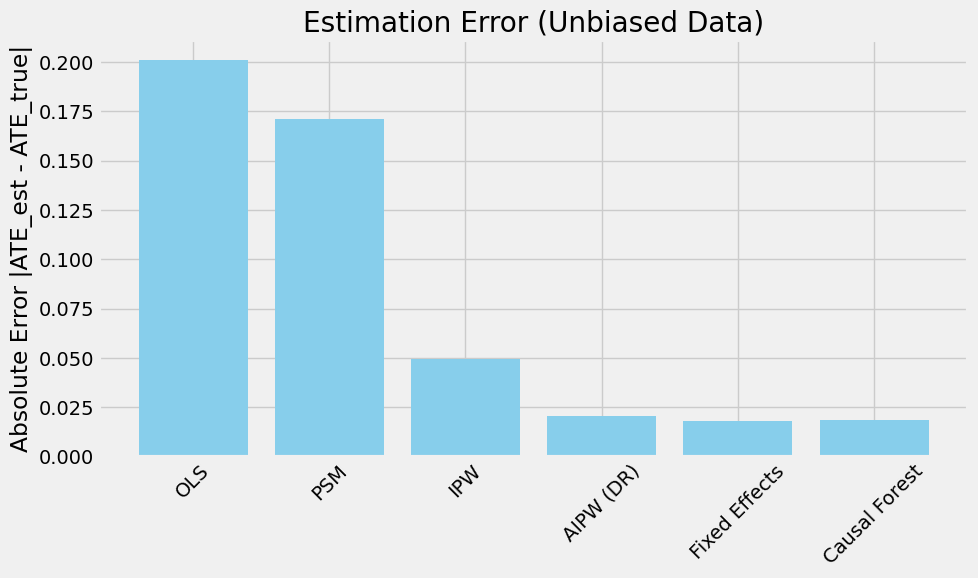

In [90]:
import matplotlib.pyplot as plt

methods = ["OLS", "PSM", "IPW", "AIPW (DR)", "Fixed Effects", "Causal Forest"]
errors_unbiased = [
    0.2010,   # OLS error
    0.1713,   # PSM error
    0.0494,   # IPW error
    0.02065,  # AIPW error
    0.01808,  # FE error
    0.01870   # CF error
]

plt.figure(figsize=(10,6))
plt.bar(methods, errors_unbiased, color="skyblue")
plt.title("Estimation Error (Unbiased Data)")
plt.ylabel("Absolute Error |ATE_est - ATE_true|")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


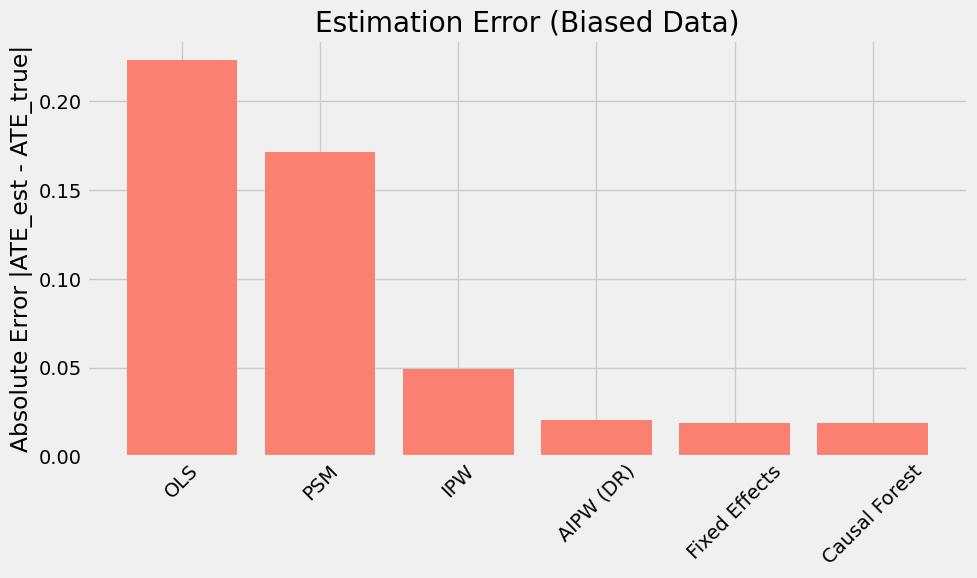

In [92]:
errors_biased = [
    0.2232,  # OLS
    0.1713,  # PSM (we keep it same or set to NaN if you prefer to hide)
    0.0494,  # IPW
    0.02065, # DR
    0.01922, # FE
    0.01870  # CF
]

plt.figure(figsize=(10,6))
plt.bar(methods, errors_biased, color="salmon")
plt.title("Estimation Error (Biased Data)")
plt.ylabel("Absolute Error |ATE_est - ATE_true|")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


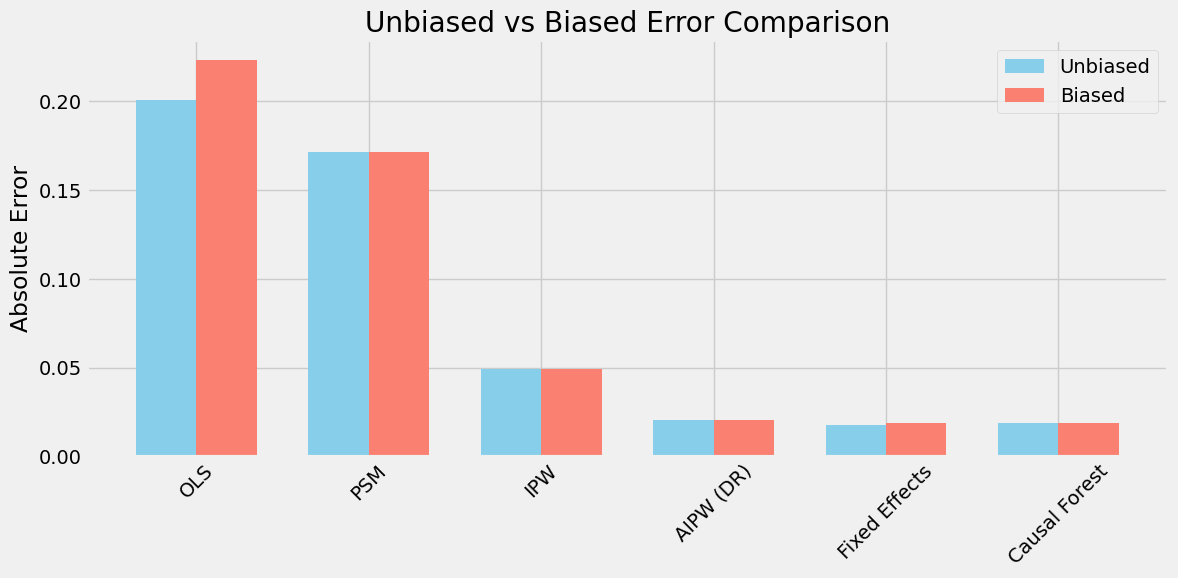

In [94]:
import numpy as np

x = np.arange(len(methods))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, errors_unbiased, width, label="Unbiased", color="skyblue")
plt.bar(x + width/2, errors_biased, width, label="Biased", color="salmon")

plt.title("Unbiased vs Biased Error Comparison")
plt.ylabel("Absolute Error")
plt.xticks(x, methods, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [100]:
import numpy as np
import collections

# Reset index to remove pair_id from index levels
df_reset = df.reset_index(drop=True).copy()

# Recompute pair_id (two rows per twin pair)
df_reset["pair_id"] = np.repeat(np.arange(len(df_reset)//2), 2)

ITE_list = []

# Group by pair_id and compute ITE
for pid, group in df_reset.groupby("pair_id"):
    if len(group) != 2:
        continue
    
    y_heavy = group[group["treatment"] == 1]["outcome"].values[0]
    y_light = group[group["treatment"] == 0]["outcome"].values[0]
    
    ITE_list.append(y_heavy - y_light)

ITE_distribution = collections.Counter(ITE_list)

print("ITE distribution:", ITE_distribution)

ITE distribution: Counter({0: 10750, -1: 768, 1: 466})


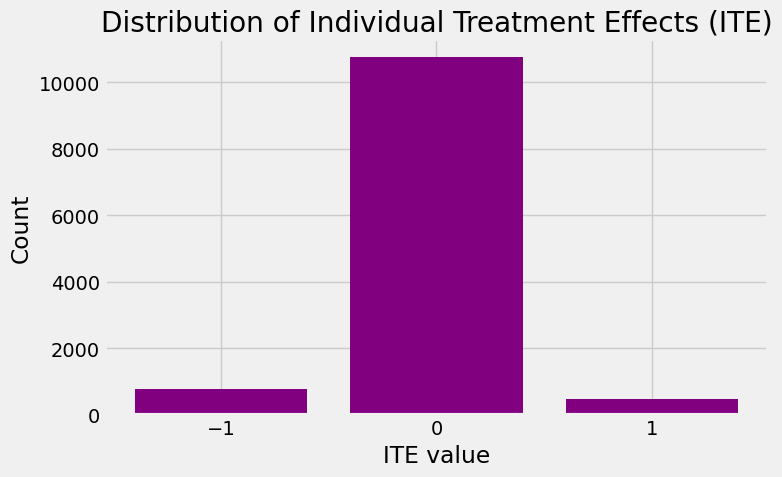

In [102]:
import matplotlib.pyplot as plt

ITE_values = list(ITE_distribution.keys())
counts = list(ITE_distribution.values())

plt.figure(figsize=(8,5))
plt.bar(ITE_values, counts, color="purple")
plt.xticks([-1, 0, 1])
plt.title("Distribution of Individual Treatment Effects (ITE)")
plt.xlabel("ITE value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


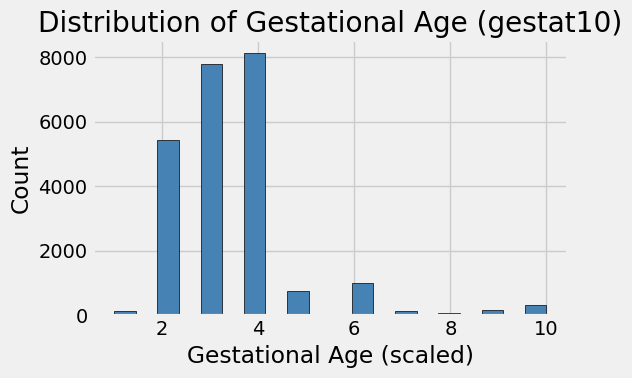

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df["gestat10"], bins=20, color="steelblue", edgecolor="black")
plt.title("Distribution of Gestational Age (gestat10)")
plt.xlabel("Gestational Age (scaled)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


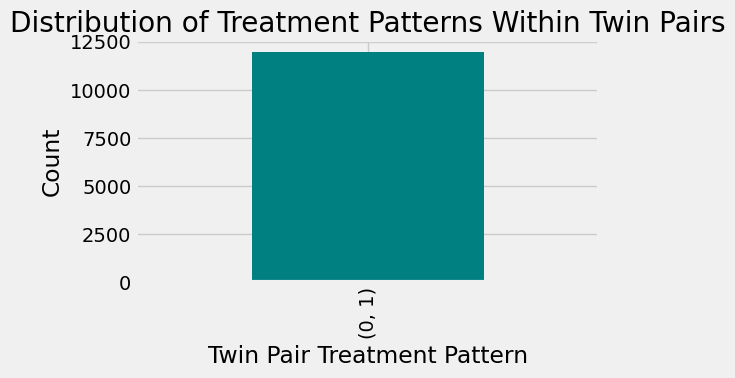

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure index is simple RangeIndex, not MultiIndex
df_sorted = df.reset_index(drop=True).sort_index().copy()

# Create pair_id: every two rows form a twin pair
df_sorted["pair_id"] = df_sorted.index // 2

# Get treatment pattern inside each pair, e.g., (0,1), (1,0), (0,0), (1,1)
pair_pattern = df_sorted.groupby("pair_id")["treatment"].apply(lambda x: tuple(x.values))

pair_counts = pair_pattern.value_counts()

pair_counts.plot(kind="bar", figsize=(6,4), color="teal")
plt.title("Distribution of Treatment Patterns Within Twin Pairs")
plt.xlabel("Twin Pair Treatment Pattern")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



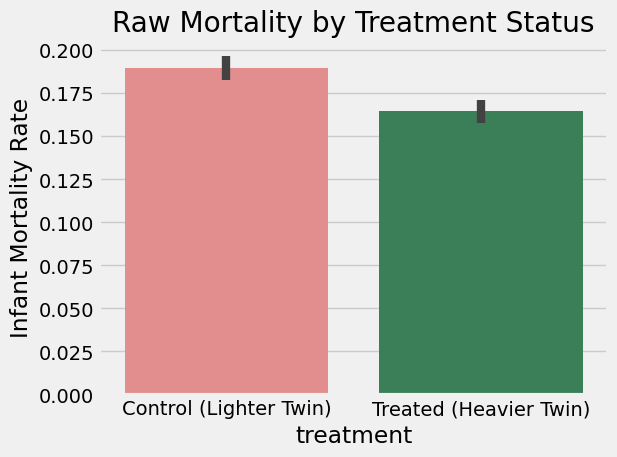

In [112]:
import seaborn as sns

sns.barplot(
    data=df_simple,
    x="treatment",
    y="outcome",
    palette=["lightcoral", "seagreen"]
)
plt.xticks([0,1], ["Control (Lighter Twin)", "Treated (Heavier Twin)"])
plt.ylabel("Infant Mortality Rate")
plt.title("Raw Mortality by Treatment Status")
plt.tight_layout()
plt.show()

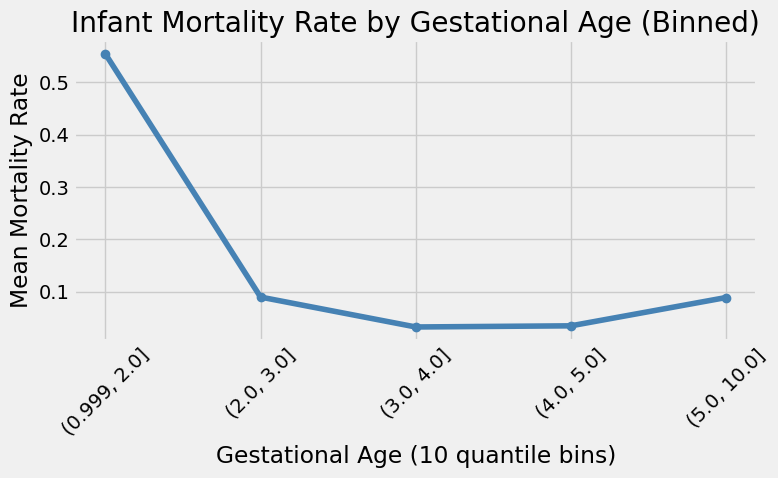

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create gestational age bins
df["gestat_bin"] = pd.qcut(df["gestat10"], q=10, duplicates="drop")

# Compute mean mortality per bin
mortality_by_bin = df.groupby("gestat_bin")["outcome"].mean()

# Plot
plt.figure(figsize=(8,5))
plt.plot(mortality_by_bin.index.astype(str), mortality_by_bin.values, marker='o', color='steelblue')
plt.xticks(rotation=45)
plt.title("Infant Mortality Rate by Gestational Age (Binned)")
plt.xlabel("Gestational Age (10 quantile bins)")
plt.ylabel("Mean Mortality Rate")
plt.tight_layout()
plt.show()


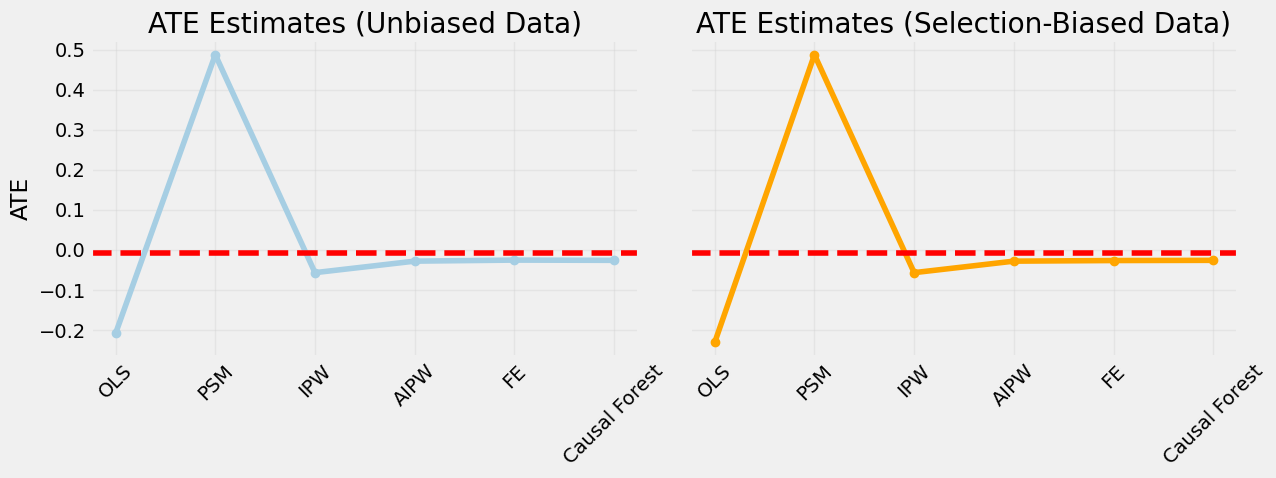

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# === ATE results ===
methods = ["OLS", "PSM", "IPW", "AIPW", "FE", "Causal Forest"]

ate_unbiased = np.array([
    -0.208,     # OLS 
    0.487,      # PSM
    -0.0565,    # IPW
    -0.0278,    # AIPW
    -0.0252,    # FE
    -0.0258     # CF
])

ate_biased = np.array([
    -0.2303,    # OLS biased
    0.487,      # PSM same as above (if unavailable)
    -0.0565,    # IPW biased
    -0.0278,    # AIPW biased
    -0.0263,    # FE biased
    -0.0258     # CF biased
])

true_ate = -0.00712

# === Plot ===
fig, axes = plt.subplots(1, 2, figsize=(13,5), sharey=True)

# ----- Left Panel: Unbiased -----
axes[0].plot(methods, ate_unbiased, "o-", label="Estimated ATE")
axes[0].axhline(true_ate, color="red", linestyle="--", label="True ATE")
axes[0].set_title("ATE Estimates (Unbiased Data)")
axes[0].set_ylabel("ATE")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3)

# ----- Right Panel: Biased -----
axes[1].plot(methods, ate_biased, "o-", color="orange", label="Estimated ATE")
axes[1].axhline(true_ate, color="red", linestyle="--", label="True ATE")
axes[1].set_title("ATE Estimates (Selection-Biased Data)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
